In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
hpd=pd.read_csv('hotels.csv')
hpd.head(20)

,Hotels,Price,Reviews,Location
0,"1. ITC Mughal, a Luxury Collection Resort & Sp...","₹28,910",4.5 of 5 bubbles,Agra
1,"2. Holiday Inn Agra Mg Road, an IHG Hotel","₹8,986",5 of 5 bubbles,Agra
2,"3. Howard Plaza The Fern, Agra","₹3,897",4 of 5 bubbles,Agra
3,"4. Taj Hotel & Convention Centre, Agra","₹12,390",4.5 of 5 bubbles,Agra
4,"5. Trident, Agra","₹11,210",4.5 of 5 bubbles,Agra
5,Hotel Clarks Shiraz,"₹5,913",4 of 5 bubbles,Agra
6,6. Hotel Taj Resorts,"₹5,319",4 of 5 bubbles,Agra
7,7. Hotel Clarks Shiraz,"₹4,457",4 of 5 bubbles,Agra
8,8. Ramada Plaza by Wyndham Agra,"₹8,114",4.5 of 5 bubbles,Agra
9,9. The Grand Imperial,"₹8,968",4 of 5 bubbles,Agra


In [3]:
#cleaning the data
hpd['Price']=hpd['Price'].str.replace('₹','')
hpd['Price']=hpd['Price'].str.replace(',','')

In [4]:
hpd['Price'] = pd.to_numeric(hpd['Price'])
#remove the decimal point
hpd['Price'] = hpd['Price'].astype(pd.Int64Dtype())

In [5]:
#remove the numbers from the name of the hotel
hpd['Hotels']=hpd['Hotels'].str.replace('\d+', '')

C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\1226342600.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  hpd['Hotels']=hpd['Hotels'].str.replace('\d+', '')


In [6]:
#remove the trailing spaces, front space and punctuation from the name of the hotel
hpd['Hotels']=hpd['Hotels'].str.replace('[^\w\s]','')
hpd['Hotels']=hpd['Hotels'].str.strip()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\3606535789.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  hpd['Hotels']=hpd['Hotels'].str.replace('[^\w\s]','')


In [7]:
hpd['Hotels']=hpd['Hotels'].str.replace('  ',' ')
hpd['Hotels']=hpd['Hotels'].astype(pd.StringDtype())

In [8]:
hpd['Hotels'].head(20)

0     ITC Mughal a Luxury Collection Resort Spa Agra
1              Holiday Inn Agra Mg Road an IHG Hotel
2                         Howard Plaza The Fern Agra
3                   Taj Hotel Convention Centre Agra
4                                       Trident Agra
5                                Hotel Clarks Shiraz
6                                  Hotel Taj Resorts
7                                Hotel Clarks Shiraz
8                       Ramada Plaza by Wyndham Agra
9                                 The Grand Imperial
10                       Tajview AgraIHCL SeleQtions
11                  Taj Hotel Convention Centre Agra
12                    Aman Homestay A Boutique Hotel
13                                     The PL Palace
14                                   Hotel Alleviate
15                                     Hotel Taj Inn
16                          Parador A Boutique Hotel
17                                   Hotel Alleviate
18                                  Hotel Taj 

In [9]:
#remove of 5 bubbles from the reviews
hpd['Reviews']=hpd['Reviews'].str.replace(' of 5 bubbles','')

In [10]:
hpd['Reviews'].head(20)

0     4.5
1       5
2       4
3     4.5
4     4.5
5       4
6       4
7       4
8     4.5
9       4
10      4
11    4.5
12      5
13    4.5
14      4
15      4
16    4.5
17      4
18      4
19    3.5
Name: Reviews, dtype: object

In [11]:
hpd['Reviews']=hpd['Reviews'].astype(pd.Float64Dtype())

In [12]:
hpd['Reviews'].head(20)

0     4.5
1     5.0
2     4.0
3     4.5
4     4.5
5     4.0
6     4.0
7     4.0
8     4.5
9     4.0
10    4.0
11    4.5
12    5.0
13    4.5
14    4.0
15    4.0
16    4.5
17    4.0
18    4.0
19    3.5
Name: Reviews, dtype: Float64

In [13]:
hpd['Price'].describe()

count          819.0
mean     7515.261294
std      8350.756424
min            589.0
25%           3060.0
50%           5363.0
75%           9417.0
max         107665.0
Name: Price, dtype: Float64

In [14]:
#display the price column with more than 20000 price
hpd[hpd['Price']>30000]

,Hotels,Price,Reviews,Location
34,The Oberoi Amarvilas,88500,5.0,Agra
109,BrijRama Palace,47789,5.0,Varanasi
111,BrijRama Palace,47789,5.0,Varanasi
135,Amritara Suryauday Haveli,32609,4.5,Varanasi
172,Apple Country Resort,107665,4.5,Manali
205,Roseate House,40804,5.0,New Delhi
341,The RitzCarlton Bangalore,79945,4.5,Bengaluru
472,Taj Falaknuma Palace Hyderabad,59000,4.5,Hyderabad
780,Pipul Hotels Resorts,63427,4.5,Puri


<AxesSubplot: ylabel='Frequency'>

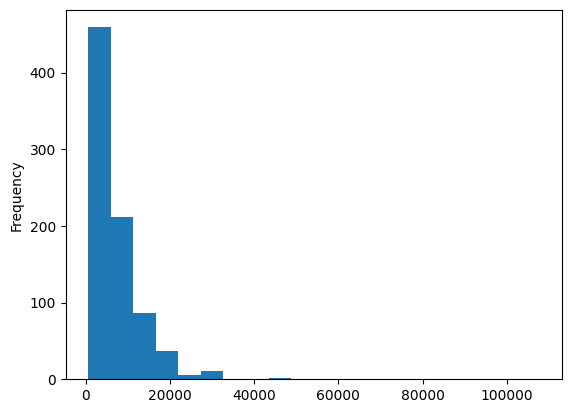

In [15]:
#eda of the data
hpd['Price'].plot(kind='hist',bins=20)


<AxesSubplot: >

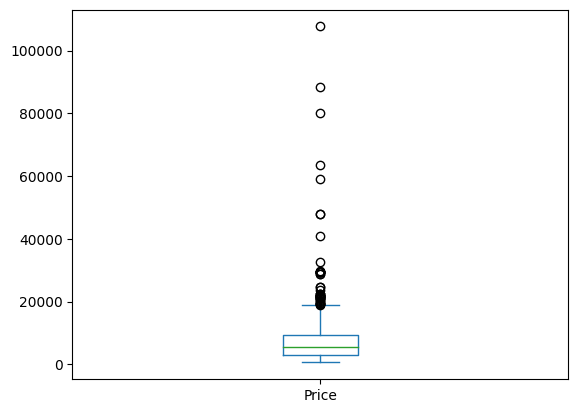

In [16]:
hpd['Price'].plot(kind='box')

<AxesSubplot: >

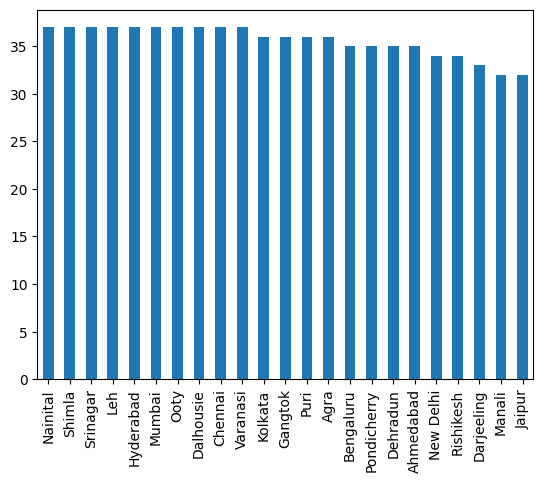

In [17]:
#eda of location column
hpd['Location'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Frequency'>

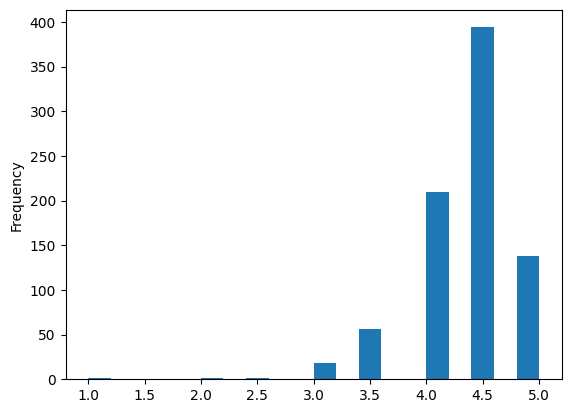

In [18]:
#eda of the reviews column
hpd['Reviews'].astype(float).plot(kind='hist',bins=20)

In [19]:
hpd['Location']=hpd['Location'].astype(pd.StringDtype())

In [20]:
hpd.columns = ['H_name', 'H_price','H_rating', 'location']

In [21]:
hpd.dtypes

H_name       string
H_price       Int64
H_rating    Float64
location     string
dtype: object

In [22]:
hpd.head(20)

,H_name,H_price,H_rating,location
0,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra
1,Holiday Inn Agra Mg Road an IHG Hotel,8986,5.0,Agra
2,Howard Plaza The Fern Agra,3897,4.0,Agra
3,Taj Hotel Convention Centre Agra,12390,4.5,Agra
4,Trident Agra,11210,4.5,Agra
5,Hotel Clarks Shiraz,5913,4.0,Agra
6,Hotel Taj Resorts,5319,4.0,Agra
7,Hotel Clarks Shiraz,4457,4.0,Agra
8,Ramada Plaza by Wyndham Agra,8114,4.5,Agra
9,The Grand Imperial,8968,4.0,Agra


In [23]:
#write the cleaned data to a csv file
#hpd.to_csv('hotels_cleaned.csv',index=False)

In [24]:
rpd=pd.read_csv('restaurants.csv')

In [25]:
rpd['name']=rpd['name'].str.replace('\d+', '')
rpd['name']=rpd['name'].str.replace('[^\w\s]','')
rpd['name']=rpd['name'].str.strip()
rpd['name']=rpd['name'].str.replace('  ',' ')
rpd['name']=rpd['name'].astype(pd.StringDtype())
rpd['name'].head(20)

C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\4097201213.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rpd['name']=rpd['name'].str.replace('\d+', '')
C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\4097201213.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rpd['name']=rpd['name'].str.replace('[^\w\s]','')


0                        The Nawaabs
1                           Taj Bano
2                    Good Vibes Cafe
3                           Peshawri
4                           Tease Me
5                             Cafe G
6                       DaawateNawab
7                   Treat Restaurant
8                        Taj Terrace
9                       Joneys Place
10         The Salt Cafe Kitchen Bar
11      The Global Savour Restaurant
12       Bambino Cafe And Restaurant
13                          DDelicia
14    Login Restaurant Roof Top Cafe
15                       Bamboo Cafe
16        Bob Marley Cafe Restaurant
17              Sheroes Hangout Cafe
18                         MoMo Cafe
19                     Masala Bistro
Name: name, dtype: string

In [26]:
rpd['rating']=rpd['rating'].str.replace(' of 5 bubbles','')
rpd['rating']=rpd['rating'].astype(pd.Float64Dtype())


In [27]:
rpd['location']=rpd['location'].astype(pd.StringDtype())

In [28]:
rpd.columns=['R_name','R_rating','location']

In [29]:
rpd.dtypes

R_name       string
R_rating    Float64
location     string
dtype: object

In [30]:
rpd.head(20)

,R_name,R_rating,location
0,The Nawaabs,5.0,Agra
1,Taj Bano,4.5,Agra
2,Good Vibes Cafe,5.0,Agra
3,Peshawri,4.5,Agra
4,Tease Me,5.0,Agra
5,Cafe G,5.0,Agra
6,DaawateNawab,5.0,Agra
7,Treat Restaurant,5.0,Agra
8,Taj Terrace,5.0,Agra
9,Joneys Place,4.5,Agra


In [31]:
#rpd.to_csv('restaurants_cleaned.csv',index=False)

In [32]:
ppd=pd.read_csv('places.csv')

In [33]:
ppd.head(20)

,name,type,rating,location
0,1. Taj Mahal,Historic Sites Points of Interest & Landmarks,5.0 of 5 bubbles,Agra
1,2. Agra Fort,Points of Interest & Landmarks Architectural...,4.5 of 5 bubbles,Agra
2,3. Tomb of Itimad-ud-Daulah,Points of Interest & Landmarks Architectural...,4.5 of 5 bubbles,Agra
3,4. Wildlife SOS,Nature & Wildlife Areas,5.0 of 5 bubbles,Agra
4,5. Mother Teresa's Missionaries of Charity,Missions Religious Sites,4.5 of 5 bubbles,Agra
5,6. Mehtab Bagh,Parks,4.0 of 5 bubbles,Agra
6,7. Sheesh Mahal,Architectural Buildings,4.5 of 5 bubbles,Agra
7,8. Agra Art Gallery,Art Galleries,4.5 of 5 bubbles,Agra
8,9. Gurudwara Guru ka Tal,Religious Sites,4.5 of 5 bubbles,Agra
9,10. Jama Masjid,Architectural Buildings Religious Sites,4.0 of 5 bubbles,Agra


In [34]:
ppd['name']=ppd['name'].str.replace('\d+', '')
ppd['name']=ppd['name'].str.replace('[^\w\s]','')
ppd['name']=ppd['name'].str.strip()
ppd['name']=ppd['name'].str.replace('  ',' ')
ppd['name']=ppd['name'].astype(pd.StringDtype())
ppd['name'].head(20)

C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\2766034954.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ppd['name']=ppd['name'].str.replace('\d+', '')
C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\2766034954.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ppd['name']=ppd['name'].str.replace('[^\w\s]','')


0                                  Taj Mahal
1                                  Agra Fort
2                     Tomb of ItimadudDaulah
3                               Wildlife SOS
4     Mother Teresas Missionaries of Charity
5                                Mehtab Bagh
6                               Sheesh Mahal
7                           Agra Art Gallery
8                      Gurudwara Guru ka Tal
9                                Jama Masjid
10      Kalakriti Cultural Convention Center
11                               Anguri Bagh
12                          Gateway of India
13                              Marine Drive
14                      BandraWorli Sea Link
15                       Shree Siddhivinayak
16              Chhatrapati Shivaji Terminus
17                           KidZania Mumbai
18                                    Colaba
19                             Nariman Point
Name: name, dtype: string

In [35]:
ppd['rating']=ppd['rating'].str.replace(' of 5 bubbles','')
ppd['rating']=ppd['rating'].astype(pd.Float64Dtype())


In [36]:
ppd['type']=ppd['type'].str.replace('\d+', '')
ppd['type']=ppd['type'].str.replace('[^\w\s]','')
ppd['type']=ppd['type'].str.strip()
ppd['type']=ppd['type'].str.replace('  ',' ')
ppd['type']=ppd['type'].astype(pd.StringDtype())

C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\3068912942.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ppd['type']=ppd['type'].str.replace('\d+', '')
C:\Users\Piyush\AppData\Local\Temp\ipykernel_26580\3068912942.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ppd['type']=ppd['type'].str.replace('[^\w\s]','')


In [37]:
ppd.head(20)

,name,type,rating,location
0,Taj Mahal,Historic Sites Points of Interest Landmarks,5.0,Agra
1,Agra Fort,Points of Interest Landmarks Architectural Bu...,4.5,Agra
2,Tomb of ItimadudDaulah,Points of Interest Landmarks Architectural Bu...,4.5,Agra
3,Wildlife SOS,Nature Wildlife Areas,5.0,Agra
4,Mother Teresas Missionaries of Charity,Missions Religious Sites,4.5,Agra
5,Mehtab Bagh,Parks,4.0,Agra
6,Sheesh Mahal,Architectural Buildings,4.5,Agra
7,Agra Art Gallery,Art Galleries,4.5,Agra
8,Gurudwara Guru ka Tal,Religious Sites,4.5,Agra
9,Jama Masjid,Architectural Buildings Religious Sites,4.0,Agra


In [38]:
ppd['location']=ppd['location'].astype(pd.StringDtype())

In [39]:
ppd.dtypes

name         string
type         string
rating      Float64
location     string
dtype: object

In [40]:
ppd.columns=['P_name','P_type','P_rating','location']

In [41]:
#clean the P_type column to remove the "Points of Interest Landmarks" and "Points of Interest" from the column
ppd['P_type']=ppd['P_type'].str.replace('Points of Interest Landmarks','')
ppd['P_type']=ppd['P_type'].str.replace('Points of Interest','')
#remove the trailing spaces and front space
ppd['P_type']=ppd['P_type'].str.strip()

In [42]:
ppd.to_csv('places_cleaned.csv',index=False)

In [43]:
# join the three dataframes into one dataframe using the location column
def join_df(hpd,rpd,ppd):
    df1 = hpd.merge(rpd, on='location')
    df2 = df1.merge(ppd, on='location')
    return df2
npd=join_df(hpd,rpd,ppd)

In [44]:
npd.head(200)

,H_name,H_price,H_rating,location,R_name,R_rating,P_name,P_type,P_rating
0,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Taj Mahal,Historic Sites,5.0
1,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Agra Fort,Architectural Buildings,4.5
2,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Tomb of ItimadudDaulah,Architectural Buildings,4.5
3,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Wildlife SOS,Nature Wildlife Areas,5.0
4,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Mother Teresas Missionaries of Charity,Missions Religious Sites,4.5
...,...,...,...,...,...,...,...,...,...
195,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,Bob Marley Cafe Restaurant,4.5,Wildlife SOS,Nature Wildlife Areas,5.0
196,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,Bob Marley Cafe Restaurant,4.5,Mother Teresas Missionaries of Charity,Missions Religious Sites,4.5
197,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,Bob Marley Cafe Restaurant,4.5,Mehtab Bagh,Parks,4.0
198,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,Bob Marley Cafe Restaurant,4.5,Sheesh Mahal,Architectural Buildings,4.5


In [45]:
#display the count, mean of data
npd.describe()

,H_price,H_rating,R_rating,P_rating
count,310236.0,310236.0,310236.0,310236.0
mean,7458.971918,4.345801,4.542761,4.336526
std,8200.144028,0.478083,0.418825,0.327042
min,589.0,1.0,3.5,3.5
25%,3123.0,4.0,4.0,4.0
50%,5363.0,4.5,4.5,4.5
75%,9177.0,4.5,5.0,4.5
max,107665.0,5.0,5.0,5.0


In [46]:
npd.head(20)

,H_name,H_price,H_rating,location,R_name,R_rating,P_name,P_type,P_rating
0,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Taj Mahal,Historic Sites,5.0
1,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Agra Fort,Architectural Buildings,4.5
2,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Tomb of ItimadudDaulah,Architectural Buildings,4.5
3,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Wildlife SOS,Nature Wildlife Areas,5.0
4,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Mother Teresas Missionaries of Charity,Missions Religious Sites,4.5
5,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Mehtab Bagh,Parks,4.0
6,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Sheesh Mahal,Architectural Buildings,4.5
7,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Agra Art Gallery,Art Galleries,4.5
8,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Gurudwara Guru ka Tal,Religious Sites,4.5
9,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Jama Masjid,Architectural Buildings Religious Sites,4.0


In [47]:
npd.describe()

,H_price,H_rating,R_rating,P_rating
count,310236.0,310236.0,310236.0,310236.0
mean,7458.971918,4.345801,4.542761,4.336526
std,8200.144028,0.478083,0.418825,0.327042
min,589.0,1.0,3.5,3.5
25%,3123.0,4.0,4.0,4.0
50%,5363.0,4.5,4.5,4.5
75%,9177.0,4.5,5.0,4.5
max,107665.0,5.0,5.0,5.0


In [48]:
#make a new column for the distance between the hotel and the restaurant randomly generated between 1 and 20 including decimals till 1 decimal place
npd['H_R_distance']=np.random.uniform(1,20, size=len(npd))

In [49]:
#round the distance column to 1 decimal place
npd['H_R_distance']=npd['H_R_distance'].round(1)

In [50]:
#make a new column for the distance between the hotel and the restaurant randomly generated between 4 and 30 including decimals till 1 decimal place that is different than previous column
npd['H_P_distance']=np.random.uniform(4,30, size=len(npd))


In [51]:
npd['H_P_distance']=npd['H_P_distance'].round(1)

In [52]:
#make a new column for the distance between the restaurant and the place by infering from the H_R_distance and H_P_distance columns 
npd['R_P_distance']=npd['H_P_distance']-npd['H_R_distance']
#make the distance column positive
npd['R_P_distance']=npd['R_P_distance'].abs()
npd['R_P_distance']=npd['R_P_distance'].round(1)

In [53]:
#make the restaurant price column by infering from the hotel price column
npd['R_price']=npd['H_price']*np.random.uniform(0.05,0.75, size=len(npd))
#round the price column to no decimal places
npd['R_price']=npd['R_price'].round(0)

#make the restaurant price column same for all the restaurants with same name
npd['R_price']=npd.groupby('R_name')['R_price'].transform('mean')

In [54]:
npd['R_price']=npd['R_price'].round(0)

In [55]:
npd.head(20)

,H_name,H_price,H_rating,location,R_name,R_rating,P_name,P_type,P_rating,H_R_distance,H_P_distance,R_P_distance,R_price
0,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Taj Mahal,Historic Sites,5.0,1.6,24.7,23.1,3534.0
1,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Agra Fort,Architectural Buildings,4.5,7.4,29.4,22.0,3534.0
2,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Tomb of ItimadudDaulah,Architectural Buildings,4.5,6.8,21.6,14.8,3534.0
3,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Wildlife SOS,Nature Wildlife Areas,5.0,2.8,9.0,6.2,3534.0
4,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Mother Teresas Missionaries of Charity,Missions Religious Sites,4.5,6.4,4.2,2.2,3534.0
5,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Mehtab Bagh,Parks,4.0,1.8,12.0,10.2,3534.0
6,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Sheesh Mahal,Architectural Buildings,4.5,3.5,9.2,5.7,3534.0
7,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Agra Art Gallery,Art Galleries,4.5,8.2,11.6,3.4,3534.0
8,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Gurudwara Guru ka Tal,Religious Sites,4.5,17.3,20.6,3.3,3534.0
9,ITC Mughal a Luxury Collection Resort Spa Agra,28910,4.5,Agra,The Nawaabs,5.0,Jama Masjid,Architectural Buildings Religious Sites,4.0,7.4,15.8,8.4,3534.0


In [56]:
npd.to_csv('joined_data.csv',index=False)